In [14]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [16]:
data_path = '/content/gdrive/My Drive/DS Project/datasets/confirmed_trendLineCoeff.csv'
data = pd.read_csv(data_path)

In [17]:
data.columns = ['index','State/UnionTerrirory','TrendLineCoeff']
data.head()


,index,State/UnionTerrirory,TrendLineCoeff
0,0,Andhra Pradesh,3197.840107
1,1,Himachal Pradesh,62.517801
2,2,Odisha,910.843764
3,3,Madhya Pradesh,569.425487
4,4,Nagaland,49.758165


In [18]:
#Creating the data 
x1 = np.array(data['index']) 
x2 = np.array(data['TrendLineCoeff']) 
x3 = np.array(data['State/UnionTerrirory'])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

In [19]:
max(x2),len(x1)

(6214.9634550381115, 36)

In [20]:
states_dict = dict(zip(list(x1),list(x3)))
states_dict


{0: 'Andhra Pradesh',
 1: 'Himachal Pradesh',
 2: 'Odisha',
 3: 'Madhya Pradesh',
 4: 'Nagaland',
 5: 'Manipur',
 6: 'Delhi',
 7: 'Mizoram',
 8: 'Gujarat',
 9: 'Maharashtra',
 10: 'Andaman and Nicobar Islands',
 11: 'Jammu and Kashmir',
 12: 'Kerala',
 13: 'Meghalaya',
 14: 'Goa',
 15: 'West Bengal',
 16: 'Ladakh',
 17: 'Uttarakhand',
 18: 'Haryana',
 19: 'Karnataka',
 20: 'Puducherry',
 21: 'Assam',
 22: 'Rajasthan',
 23: 'Uttar Pradesh',
 24: 'Jharkhand',
 25: 'Arunachal Pradesh',
 26: 'Chhattisgarh',
 27: 'Tamil Nadu',
 28: 'Tripura',
 29: 'Dadar Nagar Haveli',
 30: 'Daman & Diu',
 31: 'Sikkim',
 32: 'Bihar',
 33: 'Telangana',
 34: 'Chandigarh',
 35: 'Punjab'}

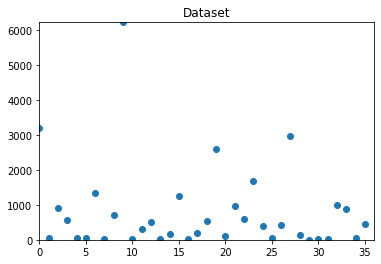

In [21]:


#Visualizing the data 
plt.plot() 
plt.xlim([0, 36]) 
plt.ylim([0, max(x2)]) 
plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show() 


In [22]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(X) 
	kmeanModel.fit(X)	 
	
	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / X.shape[0]) 
	inertias.append(kmeanModel.inertia_) 

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / X.shape[0] 
	mapping2[k] = kmeanModel.inertia_ 

for key,val in mapping1.items(): 
	print(str(key)+' : '+str(val)) 


1 : 794.538015095212
2 : 465.3652503029494
3 : 340.20759406234646
4 : 195.03138365824404
5 : 108.88130591425686
6 : 81.72709744937544
7 : 70.16356024226832
8 : 57.42532836543248
9 : 46.30900659354771


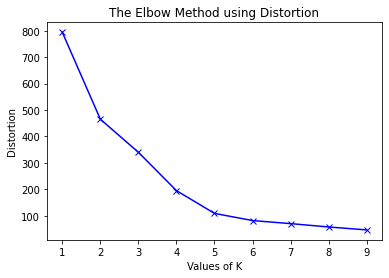

In [23]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


In [24]:
for key,val in mapping2.items(): 
	print(str(key)+' : '+str(val)) 


1 : 54090826.04797382
2 : 14771077.812552135
3 : 6168362.1708548805
4 : 1868541.3887084287
5 : 865529.0318779777
6 : 442256.1052286014
7 : 288821.52654494357
8 : 185979.40120473897
9 : 123345.25784287867


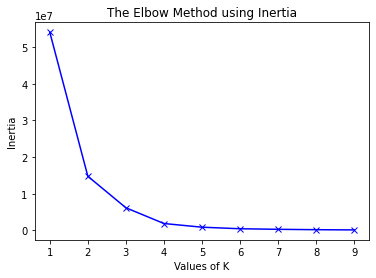

In [25]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 


k=4 ??

In [26]:
#According to the Elbow graph we deterrmine the k as 4. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# We are going to use the fit predict method that returns for each 
#observation which cluster it belongs to. The cluster to which 
#client belongs and it will return this cluster numbers into a 
#single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)
y_kmeans,len(y_kmeans)

(array([2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 0,
        3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 3], dtype=int32), 36)

In [27]:
clusters = {}
index = 0
for cur_cluster in y_kmeans:
  clusters[states_dict[index]] = cur_cluster
  index += 1
clusters

{'Andaman and Nicobar Islands': 3,
 'Andhra Pradesh': 2,
 'Arunachal Pradesh': 3,
 'Assam': 0,
 'Bihar': 0,
 'Chandigarh': 3,
 'Chhattisgarh': 3,
 'Dadar Nagar Haveli': 3,
 'Daman & Diu': 3,
 'Delhi': 0,
 'Goa': 3,
 'Gujarat': 0,
 'Haryana': 3,
 'Himachal Pradesh': 3,
 'Jammu and Kashmir': 3,
 'Jharkhand': 3,
 'Karnataka': 2,
 'Kerala': 3,
 'Ladakh': 3,
 'Madhya Pradesh': 3,
 'Maharashtra': 1,
 'Manipur': 3,
 'Meghalaya': 3,
 'Mizoram': 3,
 'Nagaland': 3,
 'Odisha': 0,
 'Puducherry': 3,
 'Punjab': 3,
 'Rajasthan': 3,
 'Sikkim': 3,
 'Tamil Nadu': 2,
 'Telangana': 0,
 'Tripura': 3,
 'Uttar Pradesh': 0,
 'Uttarakhand': 3,
 'West Bengal': 0}

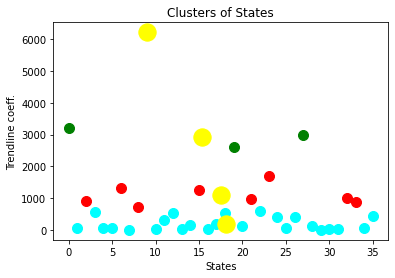

In [28]:
#Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of States')
plt.xlabel('States')
plt.ylabel('Trendline coeff.')
plt.show()

Yellow dots in above fig. are centroids of each clusters